## Veri Yükleme, Ön İşleme Şablonunun Kullanılması ve Regresyona Hazırlık
>
* **Ön işleme şablonundan bana lazım olan verileri kopyalayıp buraya yapıştırıyorum.**

In [47]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('veriler/satislar.csv')
veriler

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


In [48]:
#veri on isleme

aylar = veriler[['Aylar']]

satislar = veriler[['Satislar']]

In [49]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(aylar,satislar,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

## Basit Doğrusal Regresyon Model İnşası

In [50]:
# Model inşası (linear regression)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, Y_train) # model oluşturuyoruz, X_train'den Y_train'i öğrenmesini istiyoruz yani  burada diyoruz ki X_train ve Y_train verilerini alarak bir model inşa ediyoruz.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Basit Doğrusal Regresyon Uygulaması

In [51]:
tahmin = lr.predict(X_test) # Predict fonksiyonu tahmin etmemize yarayacak bir fonksiyon, X_test'i veriyoruz ve bize sonuç üretmesini istiyoruz.
print(tahmin)
Y_test

[[-1.62717591]
 [ 1.28634852]
 [-0.80259352]
 [-0.85756568]
 [ 1.01148773]
 [ 0.73662693]
 [ 1.01148773]
 [-0.85756568]
 [-0.36281625]
 [ 0.46176614]]


array([[-1.66597621],
       [ 1.25819492],
       [-0.99762385],
       [-0.7856508 ],
       [ 1.0709181 ],
       [ 0.81055426],
       [ 0.92122098],
       [-1.04207705],
       [-0.09933754],
       [ 0.52977719]])

* **Burada Y_test verisini tahmin etmeye çalıştık**
* **Bunları karşılaştırdık**

In [52]:
# Model inşası (linear regression)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train) # Burada direk bizim x_train ve y_train arasında bağlantı oluşturuyorum yani scaler etmediğimiz veriler için model oluşturuyoruz.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
tahmin = lr.predict(x_test) # Predict fonksiyonu tahmin etmemize yarayacak bir fonksiyon, x_test'i veriyoruz ve bize belirlenen aylardaki satış verilerinin tahmin sonuçlarını vermesini istiyoruz.
print(tahmin)
y_test

[[20991.93663769]
 [62142.93172873]
 [32638.44468232]
 [31862.01081268]
 [58260.76238052]
 [54378.59303231]
 [58260.76238052]
 [31862.01081268]
 [38849.91563946]
 [50496.4236841 ]]


,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


* **Burada y_test verisini tahmin etmeye çalıştık**
* **Bunları karşılaştırdık**

## Basit Doğrusal Regresyon Görselleştirilmesi

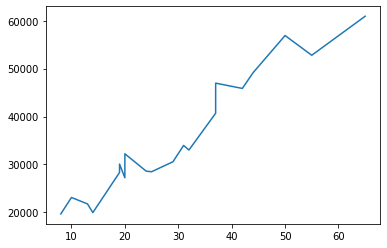

In [35]:
# plt.plot(x_train, y_train)  # böyle bir çizim yapacak olursak hatalı bir çizim yapmış oluruz çünki biz verilerimizi test ve train verisi olarak ayırırken, random olarak ayırmıştık ve aylarımızın hepsi random olarak dağıldığı için veriyi görselleştirme de hatalı bir çizim elde etmiş oluruz.
# Bu sorunu düzeltmemiz için yapmamız gereken, veriyi sıralamamız:

x_train = x_train.sort_index() # yani burada diyorum ki, verimi index'e göre sırala/sort et
y_train = y_train.sort_index()
plt.plot(x_train, y_train) # bu grafik bizim normal verilerimizin bulunduğu grafik.

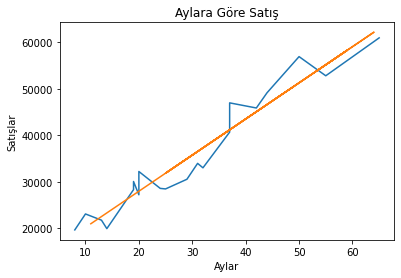

In [40]:
# Şimdi bu grafiğe bir de test verilerimizi ekleyelim

tahmin = lr.predict(x_test)

plt.title("Aylara Göre Satış") # Grafiğin başlığına isim veriyorum.
plt.xlabel("Aylar") # Grafiğin x eksenindeki ismini veriyorum.
plt.ylabel("Satışlar") # Grafiğin y eksenindeki ismini veriyorum.
plt.plot(x_train, y_train) # bu grafik bizim normal verilerimizin bulunduğu grafik.
plt.plot(x_test, tahmin) # x_test'e olan her bir değer için o değerin karşılığı olan tahmin değerini göster diyoruz

* **Burada, bizim verilerimize/noktalarımıza en yakın geçen doğruyu çizdik.**
* **Bunu nokta grafiği şekline çevirelim**

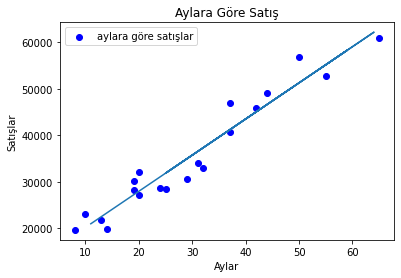

In [44]:
plt.title("Aylara Göre Satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
plt.scatter(x_train, y_train, label = 'aylara göre satışlar', color='b')
plt.plot(x_test, tahmin)
plt.legend()